In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Use only the following columns:

- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [234]:
df = pd.read_csv('car_fuel_efficiency.csv')

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [236]:
df.dtypes[df.dtypes == 'object']

origin        object
fuel_type     object
drivetrain    object
dtype: object

In [237]:
df.dtypes[df.dtypes == 'int64']

engine_displacement    int64
model_year             int64
dtype: object

In [238]:
df.dtypes[df.dtypes == 'float64']

num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

### *`Data Preparation`*

In [239]:
df2 = df.loc[:, ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

df2.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


*`Check Missing Values`*

In [240]:
df2.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [241]:
df2['horsepower'] = df2['horsepower'].fillna(df2['horsepower'].mean())

*`Check Duplicates`*

In [242]:
df2.duplicated().sum()

np.int64(0)

In [243]:
# Median of Horse Power
df2['horsepower'].median()

149.65729212983547

*`Check Datatypes`*

In [244]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           9704 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


### *`EDA`*

*`Normal Distribution`*

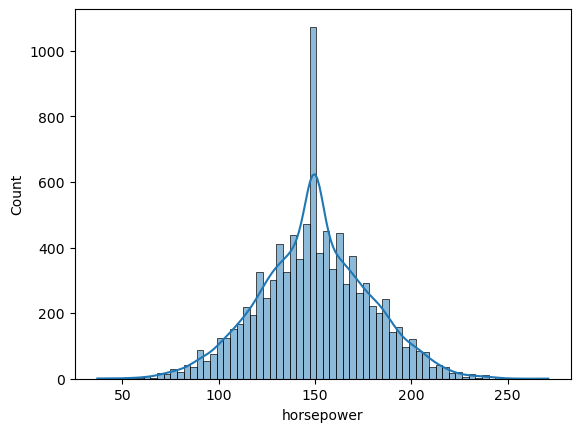

In [245]:
sns.histplot(df2, x='horsepower', kde=True)
plt.show()

*`Look at fuel_efficiency_mpg Distribution`*

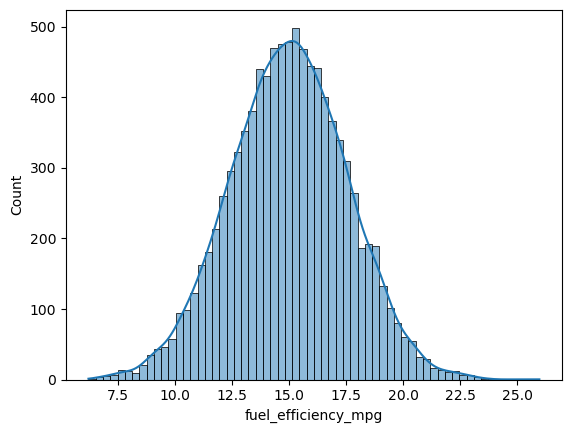

In [246]:
sns.histplot(df2, x='fuel_efficiency_mpg', kde=True)
plt.show()

*`Doesnot have a Long Tail or Skewness -> Normal Distribution`*

In [247]:
for col in df2.columns:
    print(col, '->', df2[col].nunique())
    print(df2[col].unique()[:5])

engine_displacement -> 36
[170 130 220 210 190]
horsepower -> 193
[159.          97.          78.         149.65729213 140.        ]
vehicle_weight -> 9704
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
model_year -> 24
[2003 2007 2018 2009 2008]
fuel_efficiency_mpg -> 9704
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]


*`Detect Outliers`*

Number of Outliers = 120 in engine_displacement Column


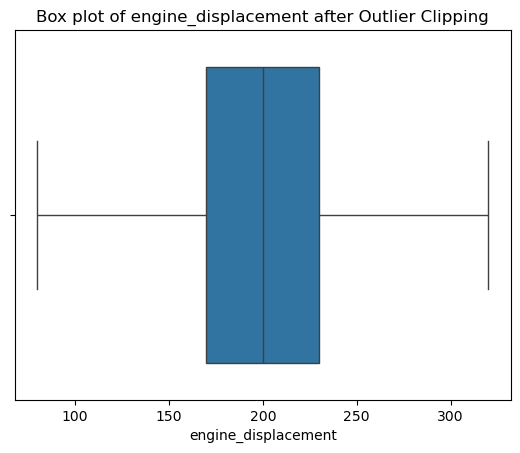

Number of Outliers = 112 in horsepower Column


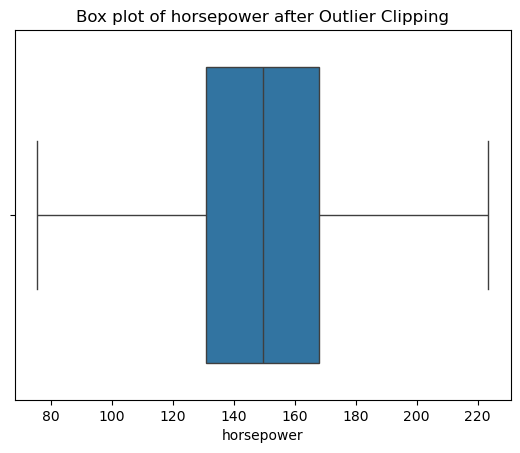

Number of Outliers = 69 in vehicle_weight Column


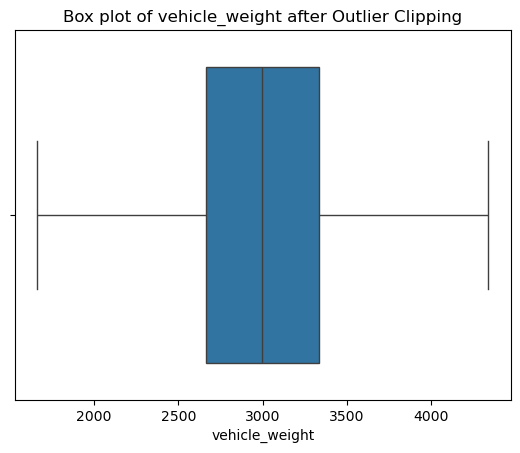

Number of Outliers = 83 in fuel_efficiency_mpg Column


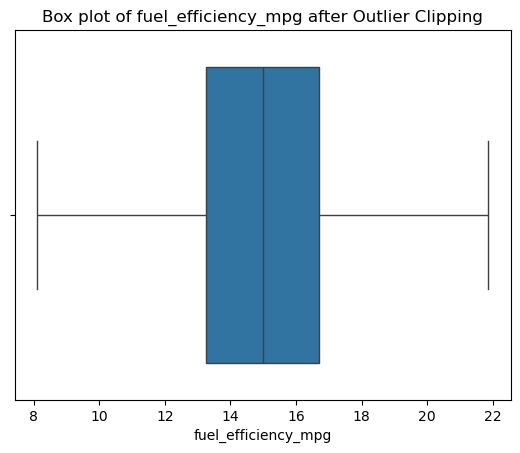

In [248]:
for col in df2.columns:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = len(df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)])
    if outliers > 0:
        print(f"Number of Outliers = {outliers} in {col} Column")
        df2[col] = df2[col].clip(lower=lower_bound, upper=upper_bound)
        sns.boxplot(df2, x=col)
        plt.title(f"Box plot of {col} after Outlier Clipping")
        plt.show()

### *`Validation Framework`*
- Training set -> 60%
- Validating set -> 20%
- Testing set -> 20%

In [249]:
m = len(df2)    # df2.shape[0]

m_train = int(0.6 * m)
m_val = int(0.2 * m)
m_test = int(0.2 * m)

m, m_train, m_val, m_test

(9704, 5822, 1940, 1940)

In [250]:
m, m_train+m_val+m_test

(9704, 9702)

*Solve this Error*

In [251]:
m_val = int(0.2 * m)
m_test = int(0.2 * m)
m_train = m - (m_val + m_test)

m, m_train + m_val + m_test

(9704, 9704)

In [252]:
df_train = df2.iloc[:m_train]
df_val = df2.iloc[m_train: m_train+m_val]
df_test = df2.iloc[m_train + m_val:]

*`Let's Shuffle Them`*

In [253]:
idx = np.arange(m)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [254]:
np.random.seed(42)
np.random.shuffle(idx)

In [255]:
df_train = df2.iloc[idx[m_train: ]]
df_val = df2.iloc[idx[m_train: m_train+m_val ]]
df_test = df2.iloc[idx[m_train+m_val: ]]

In [256]:
len(df_train), len(df_val), len(df_test)

(3880, 1940, 1940)

In [257]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [258]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### *`Linear Regression`*

In [259]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [260]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [261]:
w0 , W = train_linear_regression(df_train, y_train)

w0, W

(np.float64(25.986416604258757),
 array([ 0.00020484,  0.01004145, -0.00501793,  0.00125234]))

In [262]:
y_pred = w0 + df_val.values.dot(W)
y_pred

array([15.76728534, 14.83328297, 12.03090843, ..., 14.00238261,
       13.71704028, 16.1997401 ])

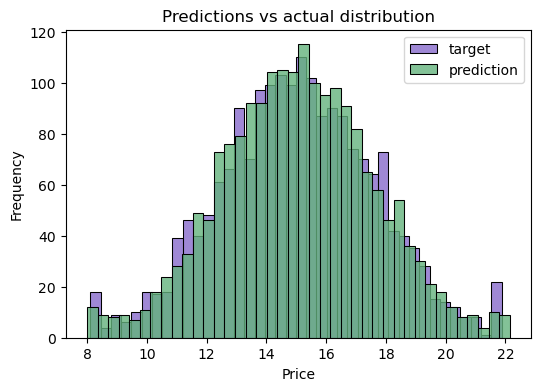

In [263]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color="#5F39B9", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#64b37d", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

*`For the case: Fill missings of 'horsepower' with mean`*

In [264]:
RMSE = rmse(y_val, y_pred)

round(RMSE, 2)

np.float64(0.46)

*`If we Fill missings in 'horsepower' column with 0`*

In [265]:
df2 = df.loc[:, ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

df2['horsepower'] = df2['horsepower'].fillna(0)

df_train = df2.iloc[idx[m_train:]]
df_val = df2.iloc[idx[m_train: m_train+m_val]]
df_test = df2.iloc[idx[m_train+m_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

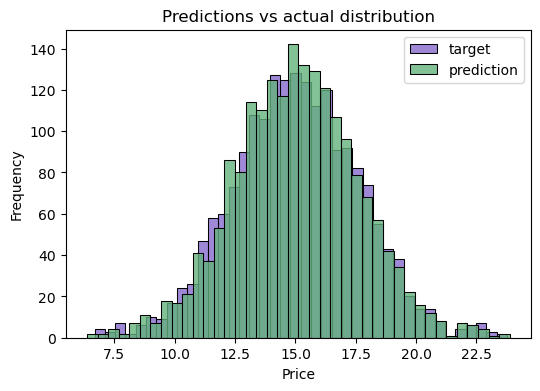

In [266]:
w0, W = train_linear_regression(df_train, y_train)

y_pred = w0 + df_val.values.dot(W)

plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color="#5F39B9", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#64b37d", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [267]:
RMSE = rmse(y_val, y_pred)

round(RMSE, 2)

np.float64(0.52)

### *`Train with Regularized Linear Regression`*

In [268]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [269]:
w0, w = train_linear_regression_reg(df_train.values, y_train, r=0.1)
y_pred = w0 + df_val.values.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(0.52)

In [270]:
for r in [0, 0.01, 1, 10, 100]:
    w0, w = train_linear_regression_reg(df_train.values, y_train, r)
    y_pred = w0 + df_val.values.dot(w)
    score = rmse(y_val, y_pred)
    print(r, ' --> ', round(score,2))

0  -->  0.52
0.01  -->  0.52
1  -->  0.52
10  -->  0.52
100  -->  0.52


In [271]:
rmse_scores = []

m = len(df2)
m_train = int(0.6 * m)
m_val = int(0.2 * m)
m_test = m - m_train - m_val

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    df2 = df2.fillna(0)
    idx = np.arange(m)
    np.random.shuffle(idx)
    df_train = df2.iloc[idx[:m_train]]
    df_val = df2.iloc[idx[m_train: m_train+m_val]]
    df_test = df2.iloc[idx[m_train+m_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    w0, w = train_linear_regression(df_train, y_train)
    y_pred = w0 + df_val.values.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

std = np.std(rmse_scores)
print(round(std, 3))

0.0


In [278]:
m = len(df2)
m_train = int(0.6 * m)
m_val = int(0.2 * m)
m_test = m - m_train - m_val

np.random.seed(9)
df2 = df2.fillna(0)
idx = np.arange(m)
np.random.shuffle(idx)
df_train = df2.iloc[idx[:m_train]]
df_val = df2.iloc[idx[m_train: m_train+m_val]]
df_test = df2.iloc[idx[m_train+m_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

w0, w = train_linear_regression_reg(df_train, y_train, r=0.001)
y_pred = w0 + df_val.values.dot(w)

round(rmse(y_val, y_pred), 6)

np.float64(0.0)